In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 1.导入必要的包之后，读取相关的csv文件

In [2]:
train_df = pd.read_csv("train.csv")
train_df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# 2.进行基本的数据认知
***
PassengerId:乘客ID <br>
Survived:是否存活<br>
Pclass:票等级，从第一级到第三级<br>
Name:乘客姓名<br>
Sex:乘客性别<br>
Age:乘客年龄<br>
SibSp:在泰坦尼克号上的堂兄弟/妹个数<br>
Parch:在泰坦尼克号上的父母/孩子个数<br>
Ticket:船票编号<br>
Fare:船票价<br>
Cabin:船舱编号<br>
Embarked:登船港口(	C = Cherbourg(瑟堡), Q = Queenstown(皇后镇), S = Southampton(南安普敦))<br>
***
### 使用pandas获取基本信息

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


## 初步信息:
一共有891条数据，注意有缺失数据Age(感觉比较重要的数据缺失),和Cabin(缺失的比较多)
***
### 接下来用pandas进行基本的统计

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 得到统计方面的一些信息:
对于存活:平均值0.38,偏低<br>
乘客等级大部分都是平民啊<br>
年龄看出还是年轻人居多，也有刚出生的小孩和老人<br>
SibSp看出平均没两个人就有一个堂兄/妹<br>
Parch看出带父母和小孩一起的还是不那么多，偏少<br>
Fare可看出票价标准差还挺大的<br>
***
# 3.接下来进行各特征的分析

Text(0,0.5,'emb_count')

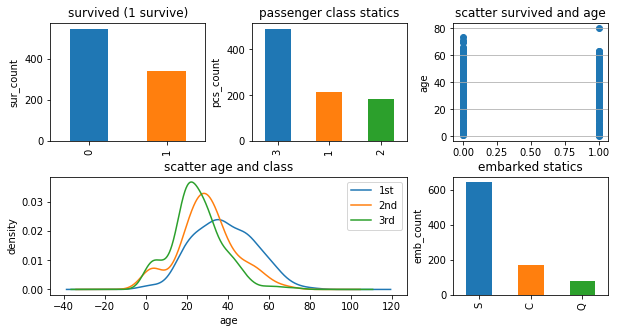

In [5]:
plt.figure(figsize=(10,5))#指定整个图标的大小
plt.subplots_adjust(wspace=0.3, hspace=0.3) # 调整subplot间距
# 最基本的，获救情况图表
plt.subplot2grid((2, 3), (0, 0)) # 图的总体布局
train_df.Survived.value_counts().plot(kind="bar")
plt.title(u"survived (1 survive)") # 标题
plt.ylabel(u"sur_count")

# 比较重要的，乘客等级分布
plt.subplot2grid((2, 3), (0, 1))
train_df.Pclass.value_counts().plot(kind="bar")
plt.title(u"passenger class statics")
plt.ylabel(u"pcs_count")

# 比较重要的，看获救与年龄的Scatter图
plt.subplot2grid((2,3),(0,2))
plt.scatter(train_df.Survived, train_df.Age)
plt.ylabel(u"age")                         # 设定纵坐标名称
plt.grid(b=True, which='major', axis='y') 
plt.title(u"scatter survived and age")

# 看看年龄与乘客等级的关系
plt.subplot2grid((2,3),(1,0), colspan=2) # colspan 代表这个图占两列
train_df.Age[train_df.Pclass == 1].plot(kind='kde') # 头等舱的乘客的年龄，画kde代表在年龄上画曲线统计图
train_df.Age[train_df.Pclass == 2].plot(kind='kde')
train_df.Age[train_df.Pclass == 3].plot(kind='kde')
plt.xlabel(u"age")# plots an axis lable
plt.ylabel(u"density") 
plt.title(u"scatter age and class")
plt.legend((u'1st', u'2nd',u'3rd'),loc='best') # sets our legend for our graph.

#  乘客一般在哪个港口上岸
plt.subplot2grid((2, 3), (1, 2))
train_df.Embarked.value_counts().plot(kind="bar")
plt.title(u"embarked statics")
plt.ylabel(u"emb_count")

## 通过作图，得到对数据的更直观的印象, 得出一点想法

- 过半都遇难了。。然后普通乘客占半数，1级和2级乘客人数差不多。
- 各个年龄都有获救和没获救的，但可以看出60多岁，如果没到70多这里都遇难了，对老人实在是不利。
- 第三个图看出年龄普遍偏年轻，普通乘客一般还是接近40岁，那群有钱人一般都比较年轻
- 最后看出大部分人都是在S港上的船(没想到这个对获救情况有啥影响没)
***
## 作图整体分析后，分别对每个属性进行统计分析, 主要分析每个属性对获救的影响

Text(0.5,0,'class')

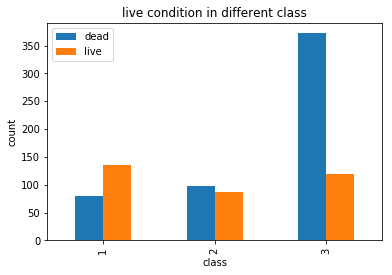

In [6]:
dead = train_df.Pclass[train_df.Survived == 0].value_counts() # 遇难的在各个等级上的数量统计
live = train_df.Pclass[train_df.Survived == 1].value_counts() # 获救的
class_survived_df = pd.DataFrame({u"live":live, u"dead":dead})
class_survived_df.plot(kind="bar")
plt.title(u"live condition in different class")
plt.ylabel(u"count")
plt.xlabel(u"class")

以上对各乘客等级进行存活统计<br>
可以看到这个因素影响比较大，果然普通人的存活率更低。。越有钱存活率越高<br>
***
下面对各性别的获救情况进行统计

Text(0.5,0,'sex')

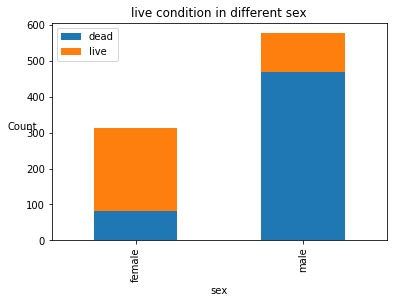

In [7]:
dead_sex = train_df.Sex[train_df.Survived == 0].value_counts() # 遇难的在各年龄上进行统计
live_sex = train_df.Sex[train_df.Survived == 1].value_counts()
sex_survived = pd.DataFrame({u"live":live_sex, u"dead":dead_sex})
sex_survived.plot(kind="bar", stacked=True)
plt.title(u"live condition in different sex")
plt.ylabel(u"Count", rotation=0)
plt.xlabel(u"sex")

上图可明显看出, 性别是个很重要的特征，外国人在死亡关头也是 **Lady First** 啊
***
再看看不同登录港口对获救情况有影响没

Text(0.5,0,'embark')

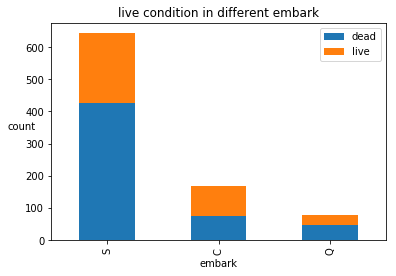

In [8]:
dead_embark = train_df.Embarked[train_df.Survived == 0].value_counts()
live_embark = train_df.Embarked[train_df.Survived == 1].value_counts()
embark_survived = pd.DataFrame({u"live":live_embark, u"dead":dead_embark})
embark_survived.plot(kind="bar",stacked=True)
plt.title(u"live condition in different embark")
plt.ylabel(u"count", rotation=0)
plt.xlabel(u"embark")

可以C港获救成功率大于Q港切明显大于S港，那这个上船港口也算一个特征
***
下面继续看船上堂兄妹数量对获救情况的影响

Text(0.5,0,'siblings / spouses aboard the Titanic\t')

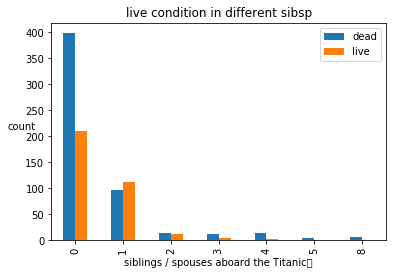

In [9]:
dead_sibsp = train_df.SibSp[train_df.Survived == 0].value_counts()
live_sibsp = train_df.SibSp[train_df.Survived == 1].value_counts()
sibsp_survived = pd.DataFrame({u"live":live_sibsp, u"dead":dead_sibsp})
sibsp_survived.plot(kind="bar")
plt.title(u"live condition in different sibsp")
plt.ylabel(u"count", rotation=0)
plt.xlabel(u"siblings / spouses aboard the Titanic	")

似乎这个对存活影响不大，再用表看一下:

In [10]:
sibsp_group = train_df.groupby(["SibSp", "Survived"])
sibsp_df = pd.DataFrame(sibsp_group.count()['PassengerId']) # 统计不同乘客编号的数量
sibsp_df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

貌似真的看不出啥，继续看父母/孩子数量对存活结果的影响

In [11]:
parch_group = train_df.groupby(["Parch", "Survived"])
parch_df = pd.DataFrame(parch_group.count()['PassengerId']) # 统计不同乘客编号的数量
parch_df

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

这个貌似也看不出什么...<br>
所以进行简单分析之后,SibSp和Parch作为备选特征,因为我没有发现很明显可以影响结果的关系
***
接下来，看看船舱的分布

In [12]:
train_df.Cabin.value_counts()[:10] # 部分结果

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
E101           3
F2             3
D              3
F33            3
B49            2
C2             2
Name: Cabin, dtype: int64

可以很明显感觉到这个特征不好进行分析，因为分布的很散，而且缺失的也比较多<br>
如果把有无Cabin信息作为一个特征的话，那么看看它对存活情况的影响:

Text(0,0.5,'passenfer count')

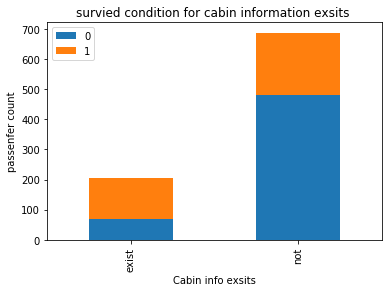

In [13]:
survived_cabin = train_df.Survived[pd.notnull(train_df.Cabin)].value_counts() # 用pd.notnull(属性) 进行判断
survived_nocabin = train_df.Survived[pd.isnull(train_df.Cabin)].value_counts() # 用pd.isnull(属性)进行判断
df=pd.DataFrame({u'exist':survived_cabin, u'not':survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"survied condition for cabin information exsits ")
plt.xlabel(u"Cabin info exsits") 
plt.ylabel(u"passenfer count")

貌似有船舱信息的存活率更高, 所以用这个先判断，做个粗粒度的判断特征

# 4.数据预处理
很关键的一步，包含了**feature engineering**等
## 先对突出的属性做处理
缺失的属性有Cabin和Age, Cabin做了简单的分析，现在来处理Age:<br>
一般来说，对**缺失数据的处理思路**:<br>
- 如果缺失值占比特别高，那就舍弃
- 如果该特征是离散的，那么将NaN作为一个新的属性值加入
- 如果该特征是连续的，那么先要对其进行**离散化**
- 如果缺失的比较少，往往根据已有的值，拟合一个值补上去

后两种思路就是适用于年龄的处理的，先试试拟合补全的方法
***
### 这里使用随机森林进行拟合补全
RandomForest是一个用在原始数据中做不同采样，建立多颗DecisionTree，再进行average等等来降低过拟合现象

In [14]:
from sklearn.ensemble import RandomForestRegressor # 随机森林回归

# 拟合缺失年龄的方法
def set_missing_ages(df):
    # 把已有的类型特征抽取出来丢进随机森林中
    age_df = df[["Age", "Fare", "Parch", "SibSp", "Pclass"]] # 仔细看这些都是数哦
    
    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    
    # y即目标年龄
    y = known_age[:, 0] # 取矩阵的n行第0列

    # X即特征属性值
    X = known_age[:, 1:] # 取矩阵的n行后几列

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y) # 对已知的年龄进行学习

    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])

    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 

    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

train_df, rfr = set_missing_ages(train_df)
train_df = set_Cabin_type(train_df)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


### 注意，上述代码只可执行一次，因为执行下一次的时候train_df已经变了
那现在我们已经把缺失的属性:Age和Cabin进行了处理了
***
接下来需要做的，是将**特征因子化**
Cabin的取值本来是["yes", "no"], 现在将它转化为Cabin_Yes和Cabin_No这两个属性

In [15]:
dummies_Cabin = pd.get_dummies(train_df["Cabin"], prefix="Cabin") # 因子化这一列，并且赋予新的列里前缀
dummies_Embarked = pd.get_dummies(train_df["Embarked"], prefix="Embarked")
dummies_Sex = pd.get_dummies(train_df["Sex"], prefix="Sex")
dummies_Pclass = pd.get_dummies(train_df["Pclass"], prefix="Pclass")
deal_df = pd.concat([train_df, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1) # 加入新的列
deal_df.drop(["Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1, inplace=True) # 删除掉以前的列，注意inplace=True
deal_df[:10]

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


## 做了缺失值处理和特征因子化之后，我们可以看到现在全是数值型的数据了<br>
## 接下来需要做的就是Scaling了(注意到Age和Fare)

In [26]:
import sklearn.preprocessing as preprocessing

scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(deal_df["Age"].values.reshape(-1,1))
deal_df["Age_scaled"] = scaler.fit_transform(deal_df["Age"].values.reshape(-1,1), age_scale_param)
fare_scale_param = scaler.fit(deal_df["Fare"].values.reshape(-1,1))
deal_df["Fare_scaled"] = scaler.fit_transform(deal_df["Fare"].values.reshape(-1,1), fare_scale_param)

# 别忘了还要删除原来的Age与Fare (有待商榷)

deal_df[:10]

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1,-0.426384,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0,1.787722,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1,-2.029569,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1,-0.194333,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0,-1.148655,-0.042956


# 5.逻辑回归建模
***
接下来我们将把处理的数据丢到回归模型中:<br>
把需要的feature抽取出来，转化成numpy格式，再使用sklean-logicRegression进行建模

In [27]:
from sklearn import linear_model

# 用正则取出我们要的属性值
learn_df = deal_df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
learn_np = learn_df.as_matrix()

# y即Survival结果
y = learn_np[:, 0]

# X即特征属性值
X = learn_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

我们很成功的得到了一个模型！
***
接下来我们要对test.csv做同样的处理:
# 7. 处理测试数据集

In [30]:
data_test = pd.read_csv("test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0

# 缺失值拟合
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()
# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X) # 注意rfr是已经有的了
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1,1), age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1,1), fare_scale_param)
df_test[:10]

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.5,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,47.0,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.0,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.0,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.0,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740
5,897,14.0,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248380,-0.471623
6,898,30.0,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,-0.034018,-0.500221
7,899,26.0,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.337609,-0.117238
8,900,18.0,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.944790,-0.507390
9,901,21.0,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717097,-0.204154


# 8.得出预测结果

In [31]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*') # 抽取了测试数据集里面的特征
predictions = clf.predict(test) # 用我们的模型去预测

# 将结果转化为DataFrame
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})

# 将结果导出到csv文件
result.to_csv("logistic_regression_result.csv", index=False) # 

# 查看结果
result[:10]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


# 我们可以看到，大功告成了!!

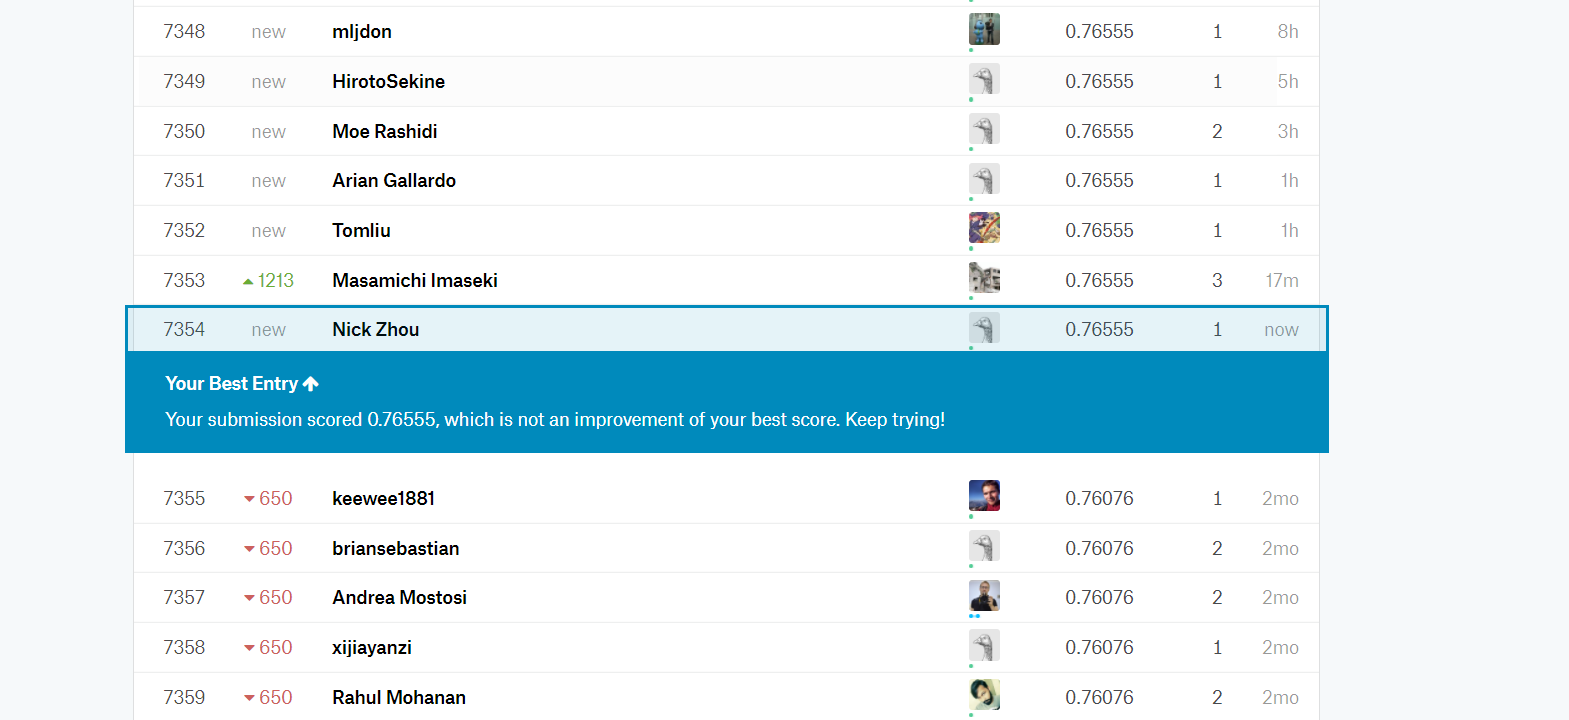
***
不过可以看到，成绩不甚理想
# 9.逻辑回归系统优化

## 9.1 模型系数的分析
***
现在我们要知道整个模型是欠拟合还是过拟合了，那么我们要画图才能知道

In [34]:
pd.DataFrame({"columns":list(learn_df.columns)[1:], "coef":list(clf.coef_.T)}) # 这样来判断是过拟合还是欠拟合
# 为正的和结果是正相关，反之是负相关

,coef,columns
0,[-0.344235254637],SibSp
1,[-0.104915280055],Parch
2,[0.0],Cabin_No
3,[0.902108365133],Cabin_Yes
4,[0.0],Embarked_C
5,[0.0],Embarked_Q
6,[-0.417258169477],Embarked_S
7,[1.95655912988],Sex_female
8,[-0.677433578932],Sex_male
9,[0.341169063286],Pclass_1


对整个模型的feature再度进行分析:
- Cabin(如果是有Cabin,会很大程度提高获救的概率)，但这样肯定挖掘的还不够，我估计有些Cabin离逃生通道近一些吧
- Age是负相关，意味着年龄越小，整体上获救概率会越大
- 如果是在S港登船的，会极大程度的降低获救概率(这里倒是没想通为什么)
- 船票Fare也有很小幅度的正相关(其实可能差别挺大的，也许做一个离散化效果就会更加的明显)
***
更好的分析，我们一定要做**交叉验证**
## 9.2 交叉验证
***
一般来说，我们需要把train.csv拆分成训练集与验证集

In [48]:
from sklearn import cross_validation

# 简单看看打分情况
# 用deal_df做交叉验证
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
all_data = deal_df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.as_matrix()[:,1:]
y = all_data.as_matrix()[:, 0]
cross_validation.cross_val_score(clf, X, y, cv=5)

array([ 0.81564246,  0.81564246,  0.78651685,  0.78651685,  0.81355932])

可以看到比kaggle的结果正确率偏高, 可以理解，毕竟是一个数据集出来的
***
接下来，既然要进行分析，那么我们先将bad case拿出来看看

In [53]:
# 按照7 : 3的比例分割数据集
split_train, split_cv = cross_validation.train_test_split(deal_df, test_size=0.3, random_state=0)
learn_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

# 生成模型
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(learn_df.as_matrix()[:,1:], learn_df.as_matrix()[:,0])

# 对cross validation数据进行预测

cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.as_matrix()[:,1:])

origin_data_train = pd.read_csv("train.csv") # 读取原始数据
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.as_matrix()[:,0]]['PassengerId'].values)]
bad_cases[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C


以上是一部分预测失败的数据
***
现在，我们列举一些优化的操作:
- Age不适合使用随机森林进行拟合，而是根据名字中的Mr, Miss, Mrs 区分性别进行平均值填充
- Age不做成连续的属性，而是使用离散化的方法
- Cabin应该处理的更细一些,将其分为字母和数字两个部分
- 对于Pclass和Sex这两个非常重要的属性，尝试做个组合属性出来
- 感觉小朋友的优先度非常高，那么单独设定一个字段;child, 将年龄小于12岁的人划分为这个字段
- 登船港口可以去掉(我们看到判断失败的数据里面很多都是S港的)
- Name也许对结果也是有影响的，可以做一些简单的处理，例如说男性中带某些字眼的(‘Capt’, ‘Don’, ‘Major’, ‘Sir’)可以统一到一个Title，女性也一样
***
现在就是拼耐心的时候了，看谁能挖到magic_feature
本位原作者最好的结果是在Survived~C(Pclass)+C(Title)+C(Sex)+C(Age_bucket)+C(Cabin_num_bucket)Mother+Fare+Family_Size 下取得的
***
一个可能的问题是:我们不断地做feature engineering, 将会产生越来越多的特征，但是有可能将会使得我们的**泛化能力越来越低**<br>
所以，我们需要画learing curve来判断当前模型所处的状态
## 9.3 Learning Curve

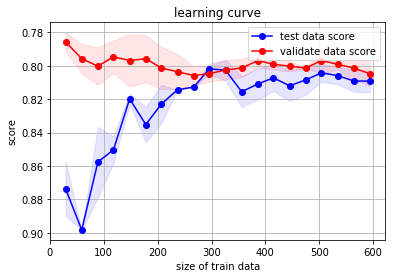

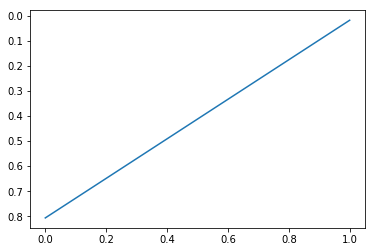

In [58]:
from sklearn.learning_curve import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"size of train data")
        plt.ylabel(u"score")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"test data score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"validate data score")

        plt.legend(loc="best")

        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plt.plot(plot_learning_curve(clf, u"learning curve", X, y))

从学习曲线来看，我们并不处于过拟合的状态(一般是validate score会比test score高)，所以我们还可以做一些feature engineering
***
接下来，我们要做的就是机器学习中的大杀器:
# 10. 模型融合(model ensemble)
***
模型融合即是说我们用一打模型去做预测，然后用投票解决最后的预测结果<br>
事实证明，模型融合可以有效的解决过拟合的问题<br>
现在，我们采用**bagging方法**<br>
所谓bagging方法就是说，我们先把训练数据集分成几个subset，这样即使出现了过拟合，那也是在哪一个subset下的，对最终的结果肯定是有帮助的<br>

现在不得不感叹scikit-learn的强大，连bagging都准备好了

In [60]:
from sklearn.ensemble import BaggingRegressor

# 提取有用特征
learn_df = deal_df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
# 转化为矩阵
learn_np = learn_df.as_matrix()

# y即Survival结果
y = learn_np[:, 0]

# X即特征属性值
X = learn_np[:, 1:]

# fit到BaggingRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
# 用bagging方法，采用30个预测器
bagging_clf = BaggingRegressor(clf, n_estimators=30, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X, y)

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_bagging_predictions.csv", index=False)
result[:10]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


# 11.总结
***
对待一个数据挖掘任务，最重要的是:
- **对数据本身的认识**
- **对特殊值(缺失值)的处理**
- **特征工程(此处要画学习曲线，挖掘新的特征)**
- **模型融合**
<br>附上网上大神的图:
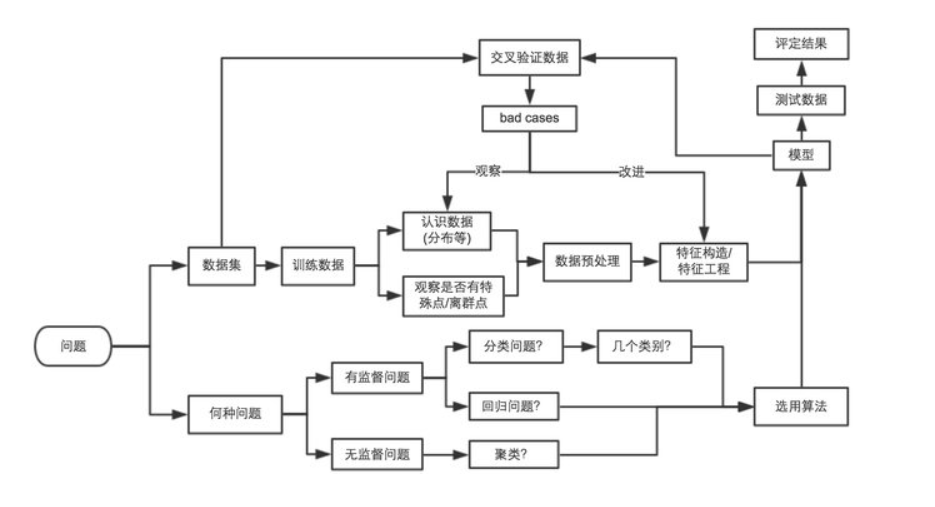